In [1]:
import zipfile

with zipfile.ZipFile("/content/archive (21).zip", 'r') as zip_ref:
    zip_ref.extractall("/content")


In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


In [3]:
#load all datasets
df1 = pd.read_csv('/content/data_dictionary.csv')
df2 = pd.read_csv('/content/products.csv')
df3 = pd.read_csv('/content/sales_pipeline.csv')
df4 = pd.read_csv('/content/sales_teams.csv')

In [4]:
df1.head()

,Table,Field,Description
0,accounts,account,Company name
1,accounts,sector,Industry
2,accounts,year_established,Year Established
3,accounts,revenue,Annual revenue (in millions of USD)
4,accounts,employees,Number of employees


In [5]:
df2.head()

,product,series,sales_price
0,GTX Basic,GTX,550
1,GTX Pro,GTX,4821
2,MG Special,MG,55
3,MG Advanced,MG,3393
4,GTX Plus Pro,GTX,5482


In [6]:
df3.head()

,opportunity_id,sales_agent,product,account,deal_stage,engage_date,close_date,close_value
0,1C1I7A6R,Moses Frase,GTX Plus Basic,Cancity,Won,2016-10-20,2017-03-01,1054.0
1,Z063OYW0,Darcel Schlecht,GTXPro,Isdom,Won,2016-10-25,2017-03-11,4514.0
2,EC4QE1BX,Darcel Schlecht,MG Special,Cancity,Won,2016-10-25,2017-03-07,50.0
3,MV1LWRNH,Moses Frase,GTX Basic,Codehow,Won,2016-10-25,2017-03-09,588.0
4,PE84CX4O,Zane Levy,GTX Basic,Hatfan,Won,2016-10-25,2017-03-02,517.0


In [7]:
df4.head()

,sales_agent,manager,regional_office
0,Anna Snelling,Dustin Brinkmann,Central
1,Cecily Lampkin,Dustin Brinkmann,Central
2,Versie Hillebrand,Dustin Brinkmann,Central
3,Lajuana Vencill,Dustin Brinkmann,Central
4,Moses Frase,Dustin Brinkmann,Central


In [9]:
#all dataset shape
(df1.shape),(df2.shape),(df3.shape),(df4.shape)

((21, 3), (7, 3), (8800, 8), (35, 3))

In [10]:
df = df3.copy()

In [11]:
df.head()

,opportunity_id,sales_agent,product,account,deal_stage,engage_date,close_date,close_value
0,1C1I7A6R,Moses Frase,GTX Plus Basic,Cancity,Won,2016-10-20,2017-03-01,1054.0
1,Z063OYW0,Darcel Schlecht,GTXPro,Isdom,Won,2016-10-25,2017-03-11,4514.0
2,EC4QE1BX,Darcel Schlecht,MG Special,Cancity,Won,2016-10-25,2017-03-07,50.0
3,MV1LWRNH,Moses Frase,GTX Basic,Codehow,Won,2016-10-25,2017-03-09,588.0
4,PE84CX4O,Zane Levy,GTX Basic,Hatfan,Won,2016-10-25,2017-03-02,517.0


In [12]:
df.isnull().sum()

,0
opportunity_id,0
sales_agent,0
product,0
account,1425
deal_stage,0
engage_date,500
close_date,2089
close_value,2089


In [16]:
#fill null value

df['deal_stage'] = df['deal_stage'].fillna(df['deal_stage'].mode()[0])
df['product'] = df['product'].fillna(df['product'].mode()[0])
df['close_date'] = df['close_date'].fillna(df['close_date'].mode()[0])
df['sales_agent'] = df['sales_agent'].fillna(df['sales_agent'].mode()[0])
df['close_value'] = df['close_value'].fillna(df['close_value'].mode()[0])
df['engage_date'] = df['engage_date'].fillna(df['engage_date'].mode()[0])
df['account'] = df['account'].fillna(df['account'].mode()[0])


df.isnull().sum()


,0
opportunity_id,0
sales_agent,0
product,0
account,0
deal_stage,0
engage_date,0
close_date,0
close_value,0


In [17]:
df.head()

,opportunity_id,sales_agent,product,account,deal_stage,engage_date,close_date,close_value
0,1C1I7A6R,Moses Frase,GTX Plus Basic,Cancity,Won,2016-10-20,2017-03-01,1054.0
1,Z063OYW0,Darcel Schlecht,GTXPro,Isdom,Won,2016-10-25,2017-03-11,4514.0
2,EC4QE1BX,Darcel Schlecht,MG Special,Cancity,Won,2016-10-25,2017-03-07,50.0
3,MV1LWRNH,Moses Frase,GTX Basic,Codehow,Won,2016-10-25,2017-03-09,588.0
4,PE84CX4O,Zane Levy,GTX Basic,Hatfan,Won,2016-10-25,2017-03-02,517.0


<Axes: xlabel='sales_agent'>

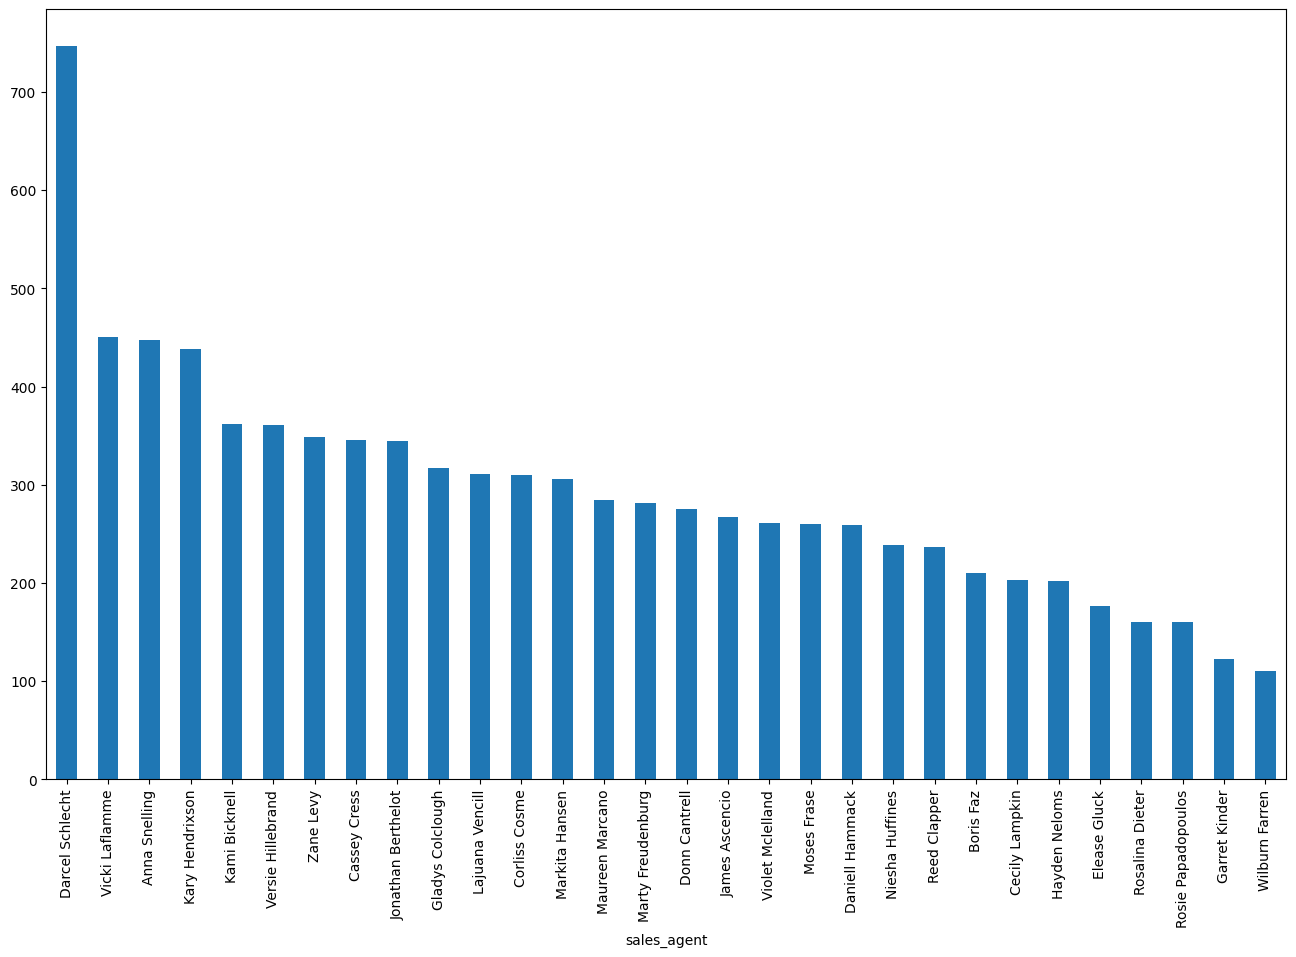

In [19]:
df['sales_agent'].value_counts().plot(kind='bar', figsize=(16,10))

<Axes: xlabel='product'>

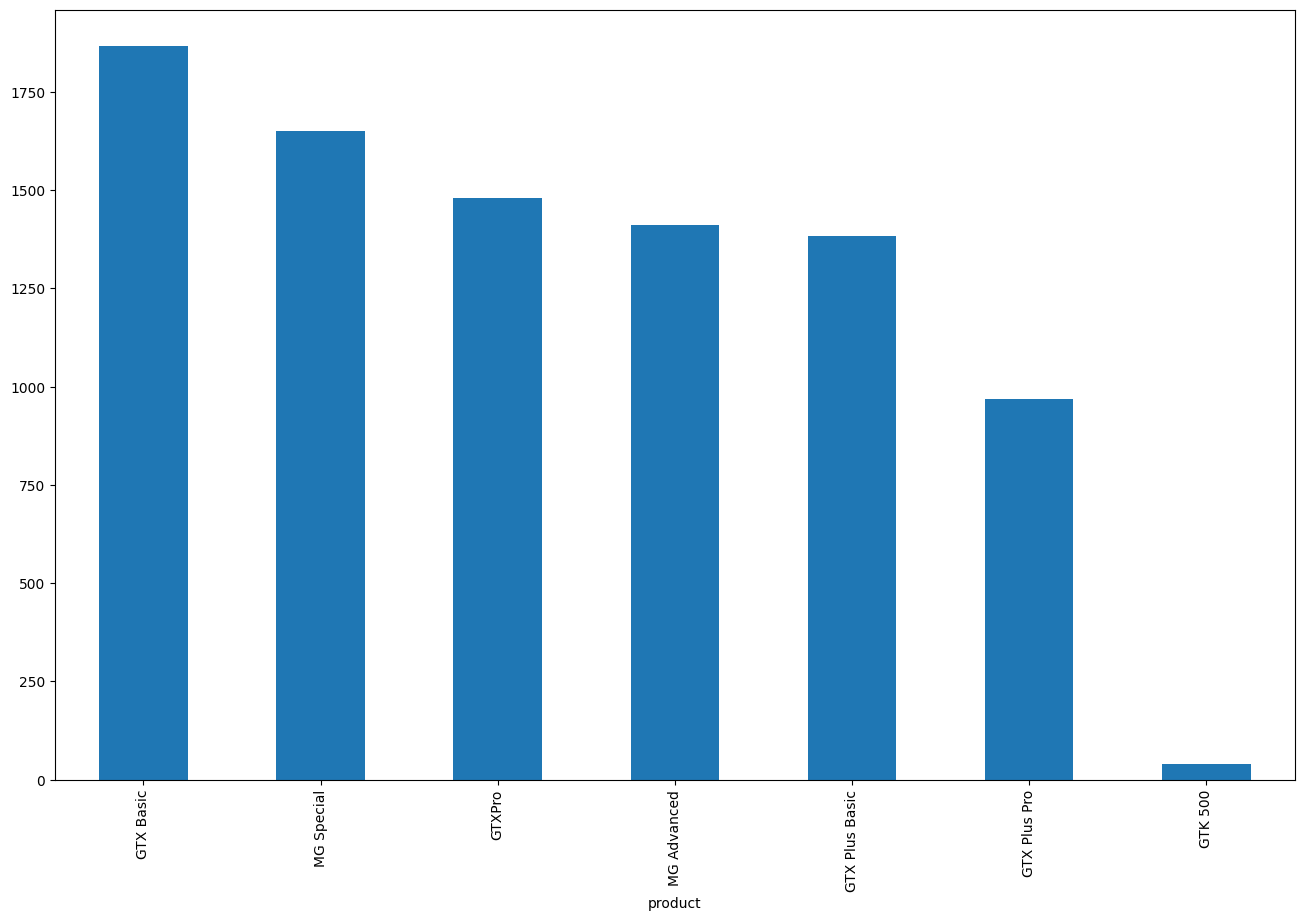

In [20]:
df['product'].value_counts().plot(kind='bar', figsize=(16,10))

<Axes: xlabel='account'>

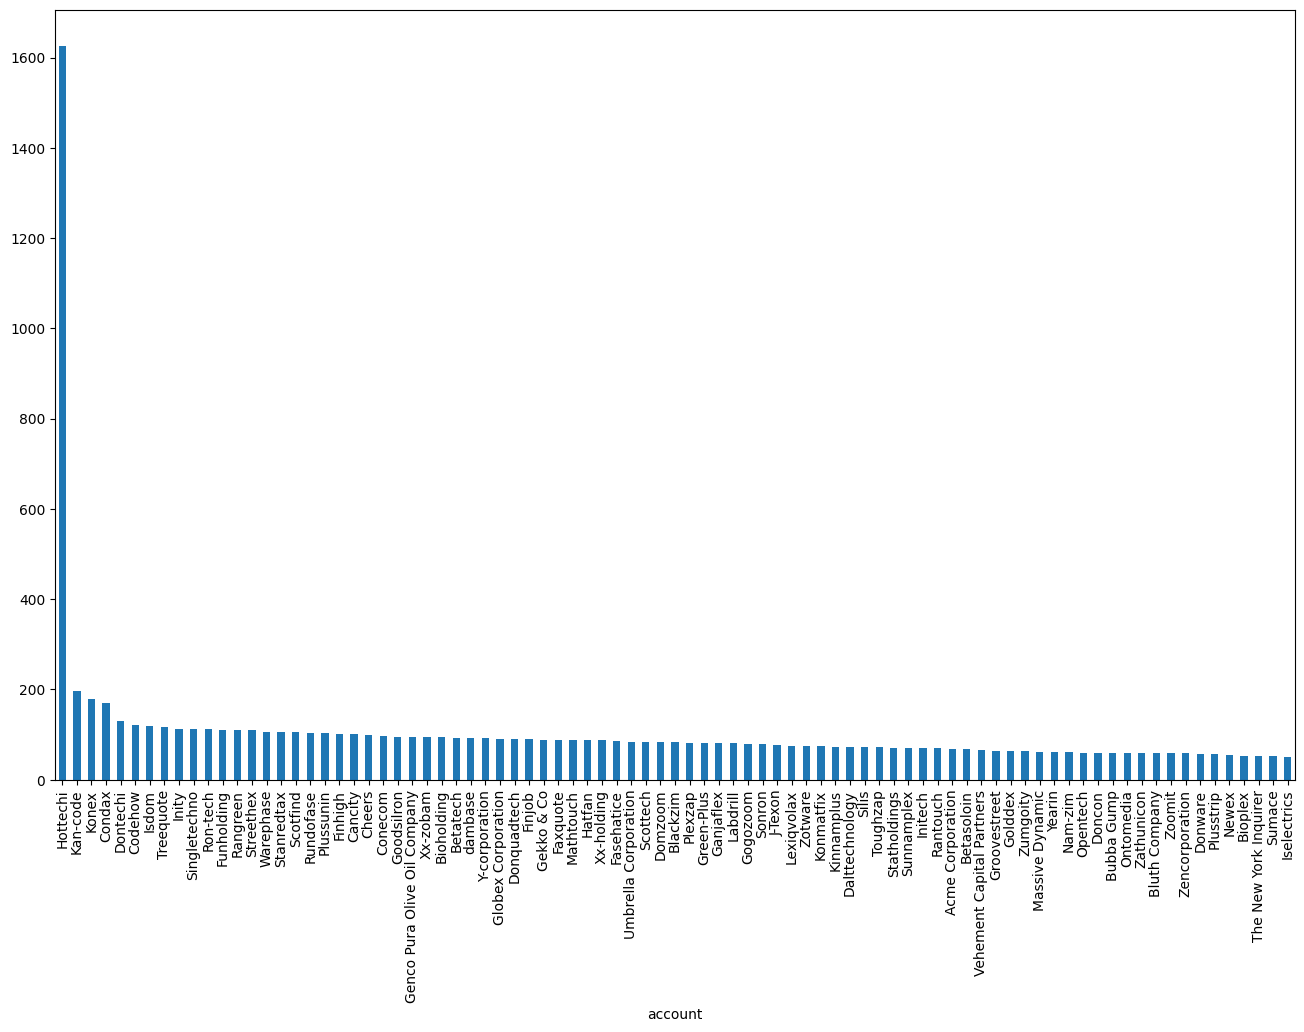

In [22]:
df['account'].value_counts().plot(kind='bar', figsize=(16,10))

<ipython-input-23-030e7da30404>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=agent_performance.values, y=agent_performance.index, palette="Blues_r")


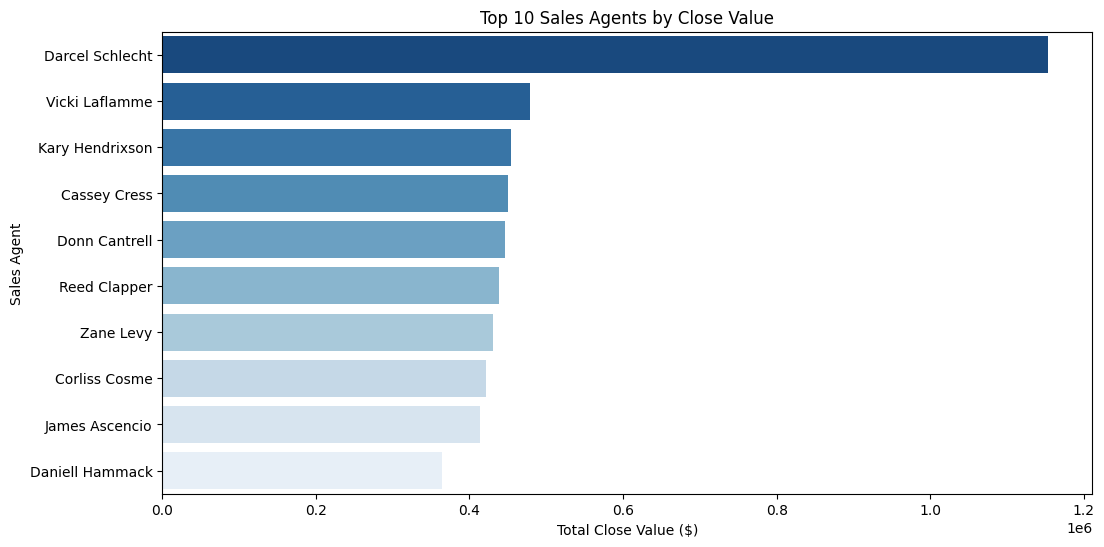

<ipython-input-23-030e7da30404>:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=product_sales.index, y=product_sales.values, palette="Greens_r")


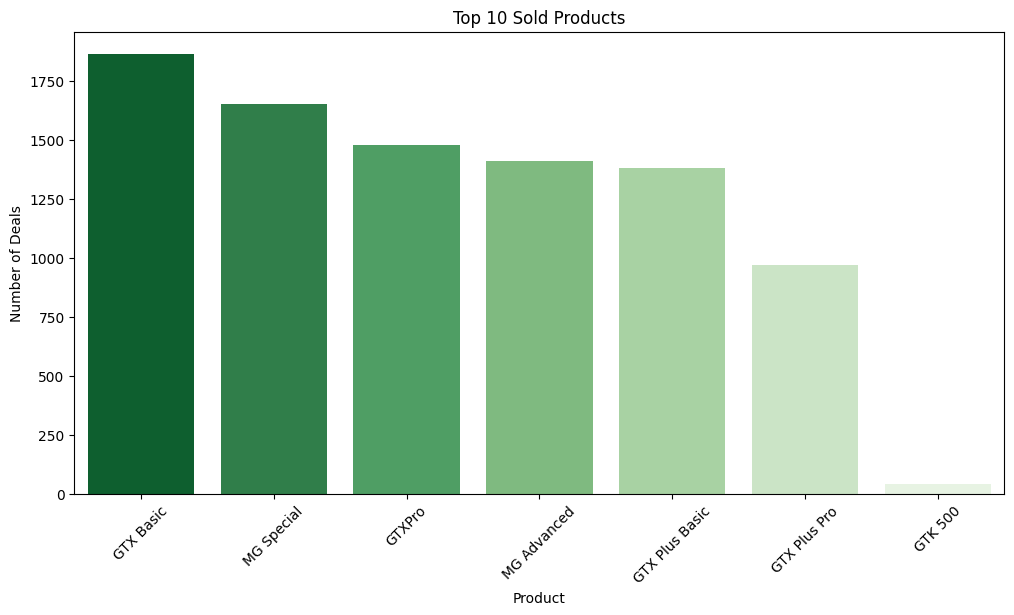

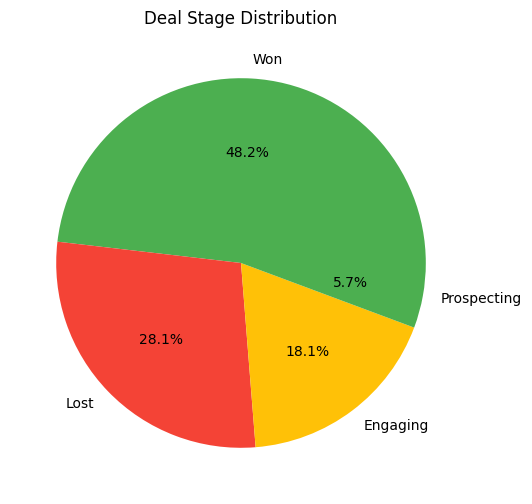

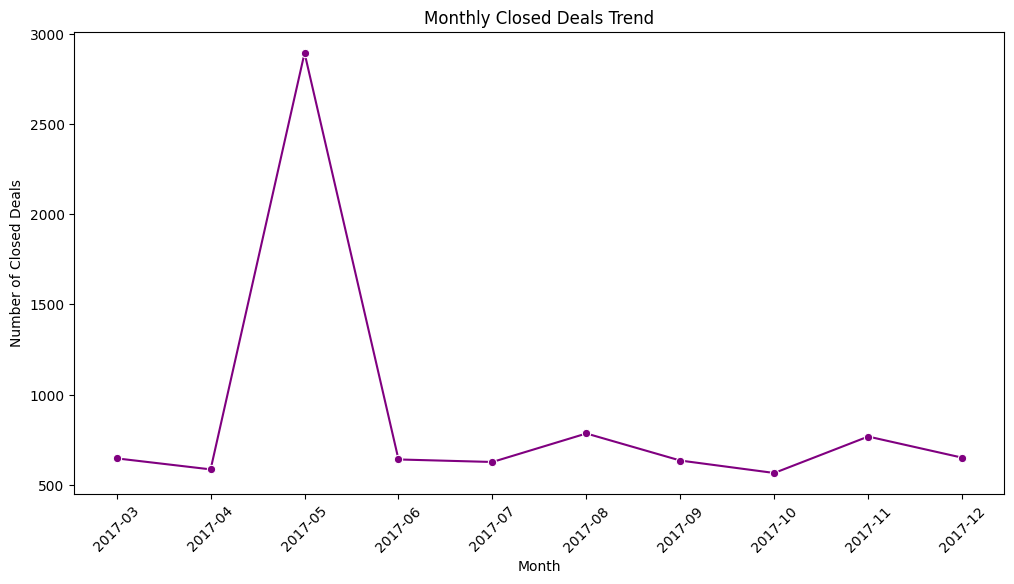

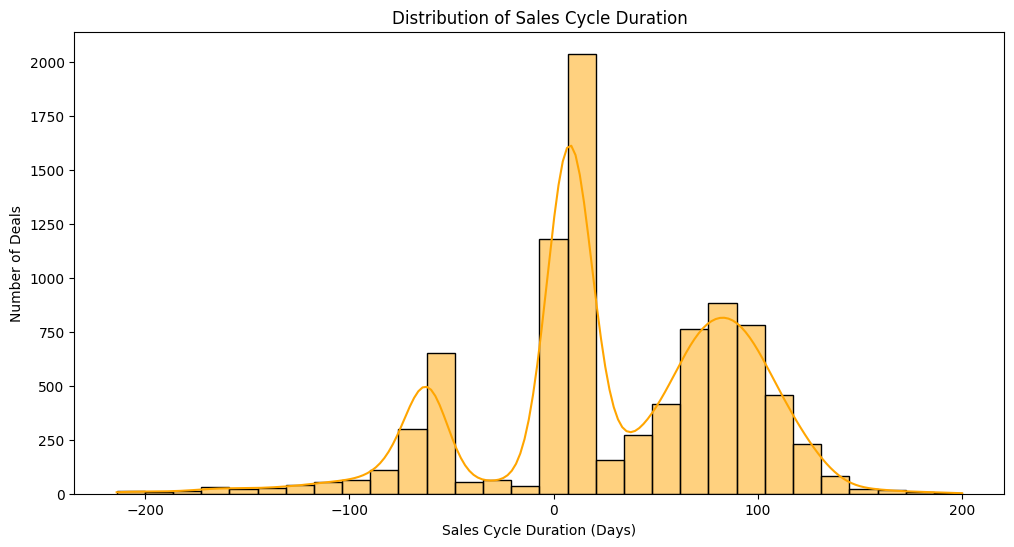

In [23]:
# Convert date columns to datetime format
df["engage_date"] = pd.to_datetime(df["engage_date"], errors="coerce")
df["close_date"] = pd.to_datetime(df["close_date"], errors="coerce")

# 1. Sales Agent Performance (Total Close Value per Agent)
plt.figure(figsize=(12, 6))
agent_performance = df.groupby("sales_agent")["close_value"].sum().sort_values(ascending=False).head(10)
sns.barplot(x=agent_performance.values, y=agent_performance.index, palette="Blues_r")
plt.xlabel("Total Close Value ($)")
plt.ylabel("Sales Agent")
plt.title("Top 10 Sales Agents by Close Value")
plt.show()

# 2. Product-wise Sales Distribution
plt.figure(figsize=(12, 6))
product_sales = df["product"].value_counts().head(10)
sns.barplot(x=product_sales.index, y=product_sales.values, palette="Greens_r")
plt.xlabel("Product")
plt.ylabel("Number of Deals")
plt.title("Top 10 Sold Products")
plt.xticks(rotation=45)
plt.show()

# 3. Deal Stage Analysis (Won vs Lost)
plt.figure(figsize=(6, 6))
deal_stage_counts = df["deal_stage"].value_counts()
plt.pie(deal_stage_counts, labels=deal_stage_counts.index, autopct='%1.1f%%', colors=["#4CAF50", "#F44336", "#FFC107"])
plt.title("Deal Stage Distribution")
plt.show()

# 4. Monthly Closed Deals Over Time
df["close_month"] = df["close_date"].dt.to_period("M")
monthly_deals = df["close_month"].value_counts().sort_index()

plt.figure(figsize=(12, 6))
sns.lineplot(x=monthly_deals.index.astype(str), y=monthly_deals.values, marker="o", color="purple")
plt.xticks(rotation=45)
plt.xlabel("Month")
plt.ylabel("Number of Closed Deals")
plt.title("Monthly Closed Deals Trend")
plt.show()

# 5. Sales Cycle Duration (Close Date - Engage Date)
df["sales_cycle_days"] = (df["close_date"] - df["engage_date"]).dt.days
plt.figure(figsize=(12, 6))
sns.histplot(df["sales_cycle_days"].dropna(), bins=30, kde=True, color="orange")
plt.xlabel("Sales Cycle Duration (Days)")
plt.ylabel("Number of Deals")
plt.title("Distribution of Sales Cycle Duration")
plt.show()


<ipython-input-24-aef9b82ee5a6>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=agent_avg_sales.values, y=agent_avg_sales.index, palette="coolwarm")


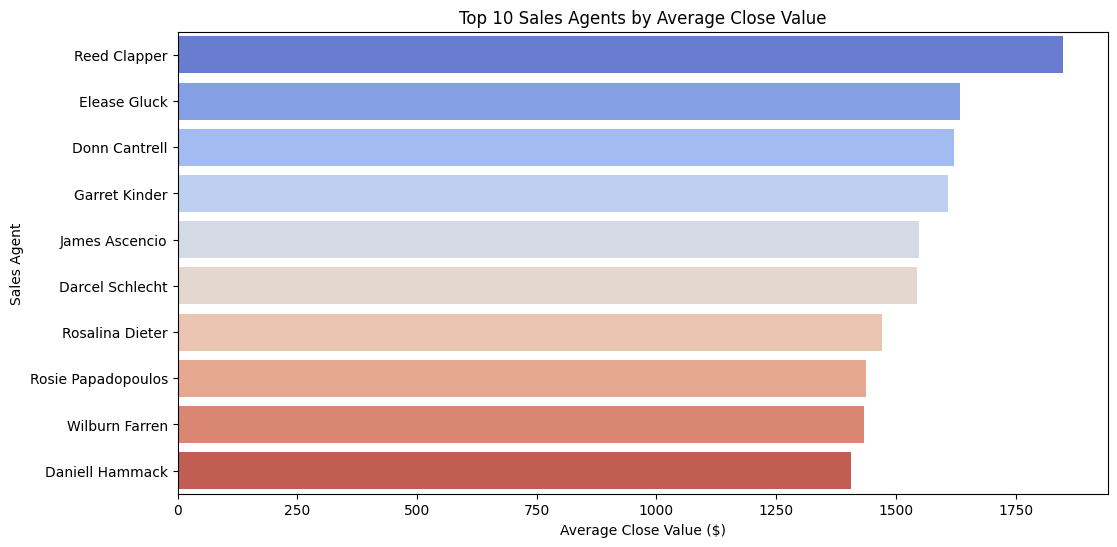

<ipython-input-24-aef9b82ee5a6>:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=product_revenue.index, y=product_revenue.values, palette="magma")


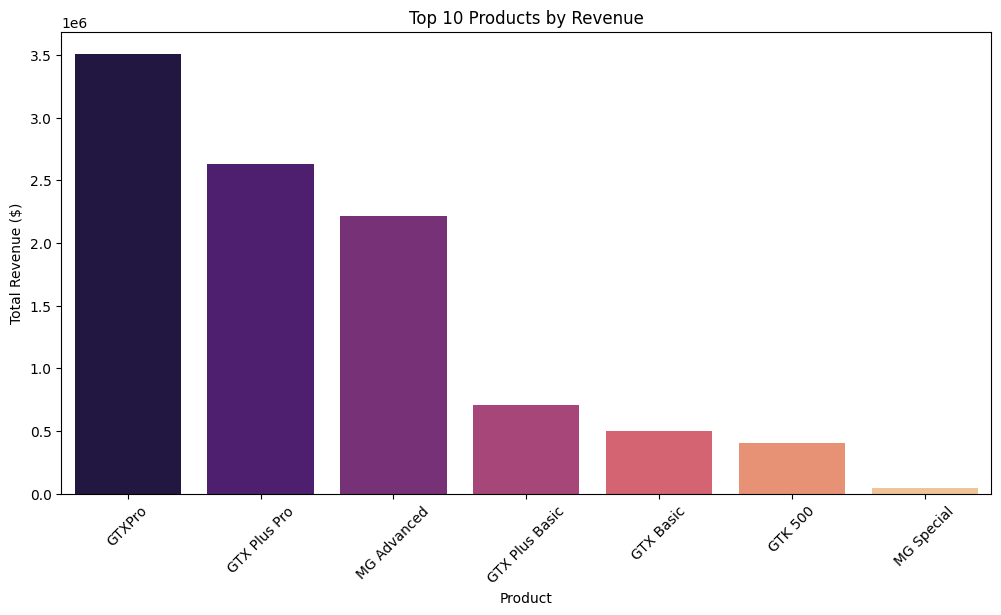

<ipython-input-24-aef9b82ee5a6>:23: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=account_deals.index, y=account_deals.values, palette="Set2")


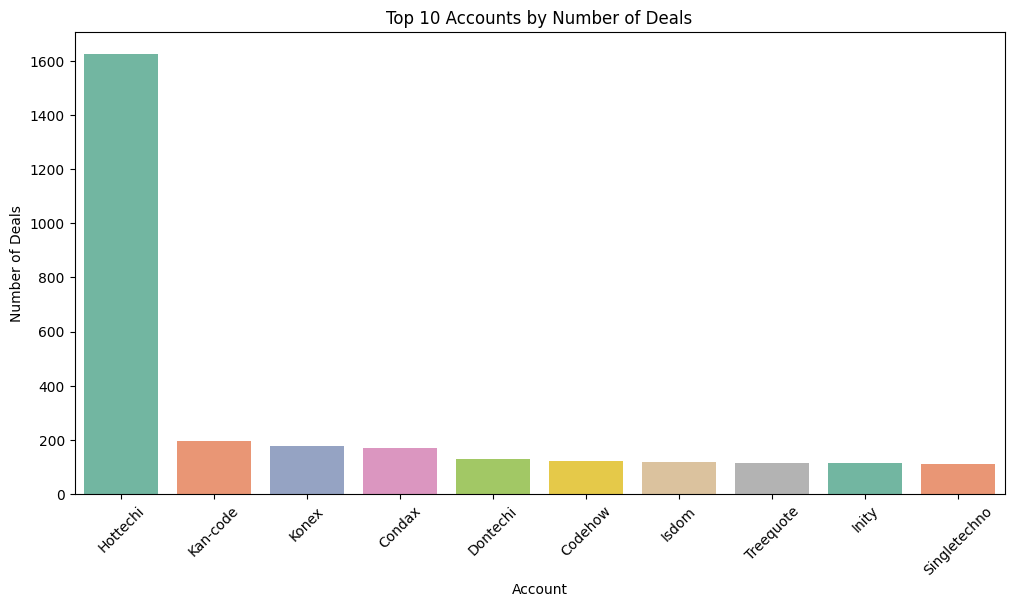

<ipython-input-24-aef9b82ee5a6>:32: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=df["deal_stage"], y=df["sales_cycle_days"], palette="viridis")


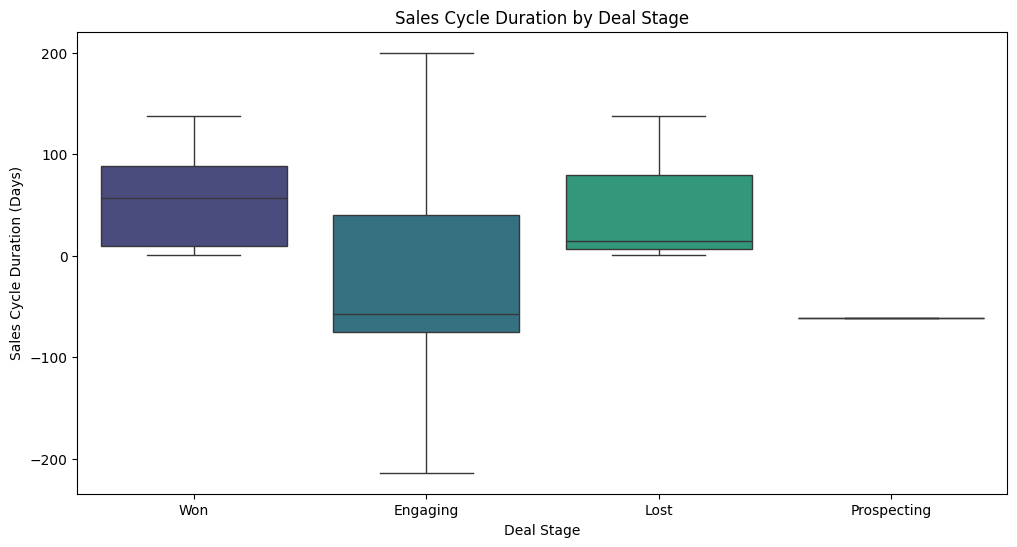

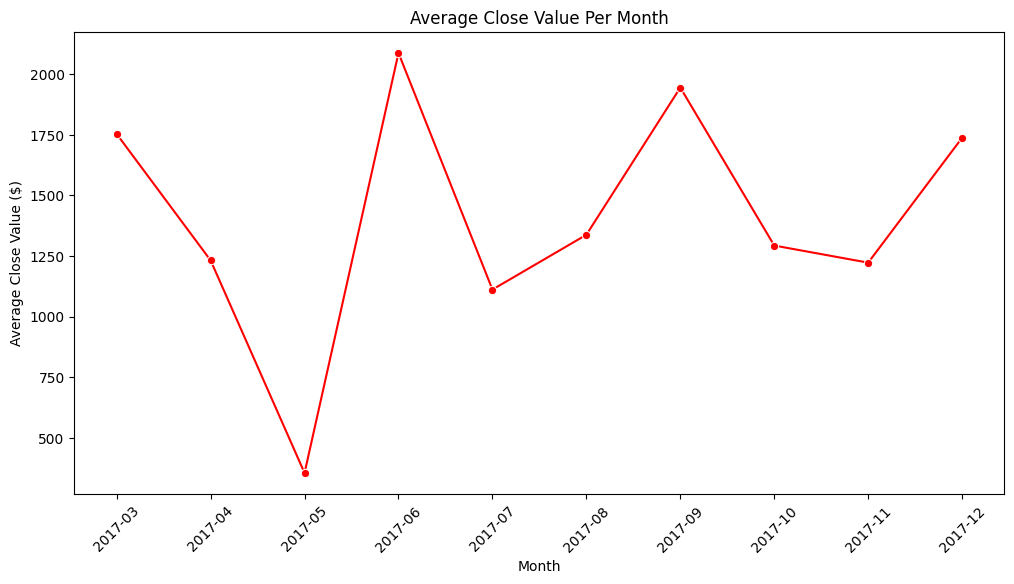

In [24]:
# 1. Average Close Value per Sales Agent (Top 10)
plt.figure(figsize=(12, 6))
agent_avg_sales = df.groupby("sales_agent")["close_value"].mean().sort_values(ascending=False).head(10)
sns.barplot(x=agent_avg_sales.values, y=agent_avg_sales.index, palette="coolwarm")
plt.xlabel("Average Close Value ($)")
plt.ylabel("Sales Agent")
plt.title("Top 10 Sales Agents by Average Close Value")
plt.show()

# 2. Total Revenue by Product
plt.figure(figsize=(12, 6))
product_revenue = df.groupby("product")["close_value"].sum().sort_values(ascending=False).head(10)
sns.barplot(x=product_revenue.index, y=product_revenue.values, palette="magma")
plt.xlabel("Product")
plt.ylabel("Total Revenue ($)")
plt.title("Top 10 Products by Revenue")
plt.xticks(rotation=45)
plt.show()

# 3. Top Accounts by Number of Deals
plt.figure(figsize=(12, 6))
account_deals = df["account"].value_counts().dropna().head(10)
sns.barplot(x=account_deals.index, y=account_deals.values, palette="Set2")
plt.xlabel("Account")
plt.ylabel("Number of Deals")
plt.title("Top 10 Accounts by Number of Deals")
plt.xticks(rotation=45)
plt.show()

# 4. Sales Cycle Duration by Deal Stage
plt.figure(figsize=(12, 6))
sns.boxplot(x=df["deal_stage"], y=df["sales_cycle_days"], palette="viridis")
plt.xlabel("Deal Stage")
plt.ylabel("Sales Cycle Duration (Days)")
plt.title("Sales Cycle Duration by Deal Stage")
plt.show()

# 5. Average Close Value per Month
monthly_avg_revenue = df.groupby(df["close_month"])["close_value"].mean().dropna()
plt.figure(figsize=(12, 6))
sns.lineplot(x=monthly_avg_revenue.index.astype(str), y=monthly_avg_revenue.values, marker="o", color="red")
plt.xticks(rotation=45)
plt.xlabel("Month")
plt.ylabel("Average Close Value ($)")
plt.title("Average Close Value Per Month")
plt.show()


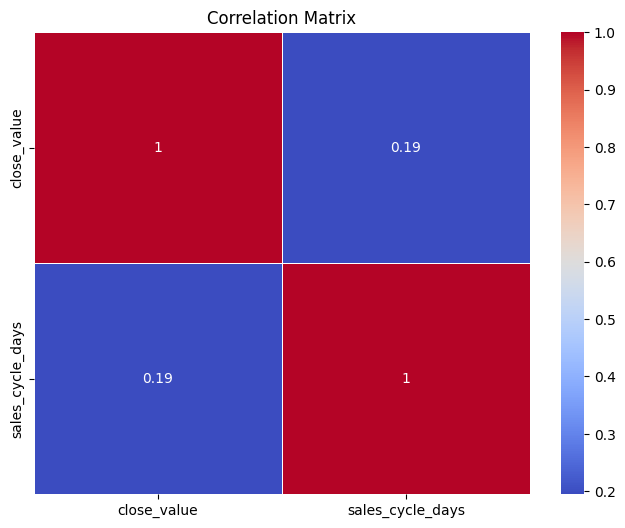

<ipython-input-26-d0ffda5510a9>:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=deal_stage_counts.index, y=deal_stage_counts.values, palette="coolwarm")


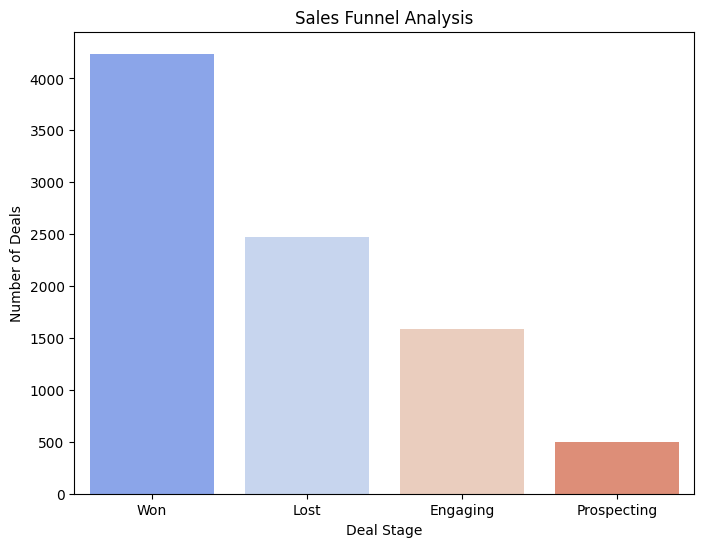

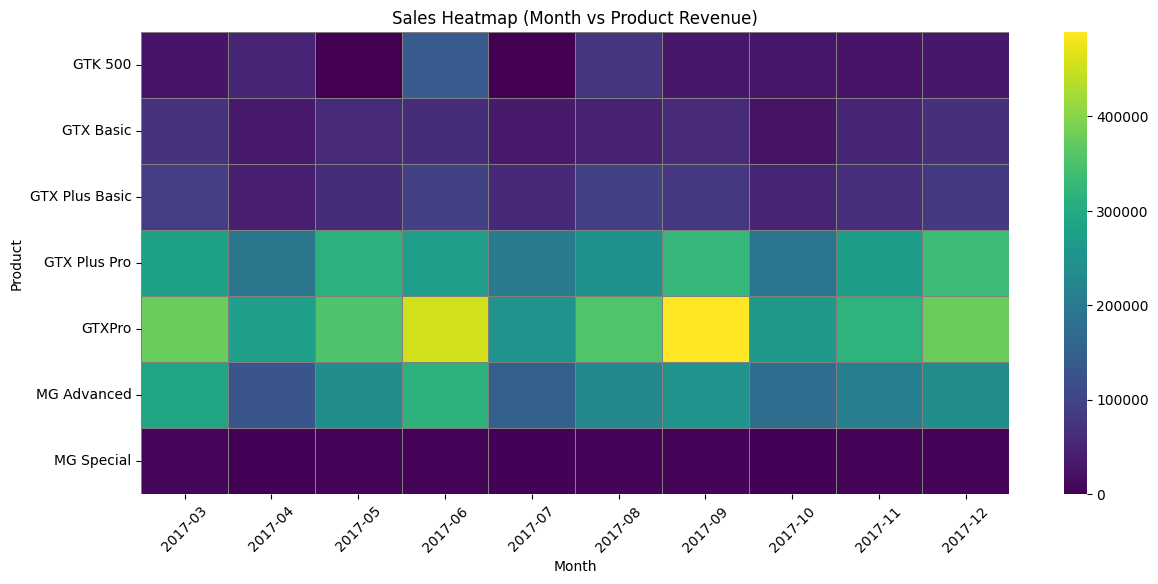

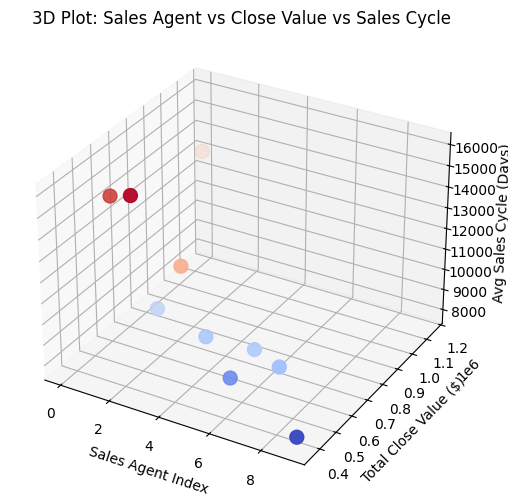

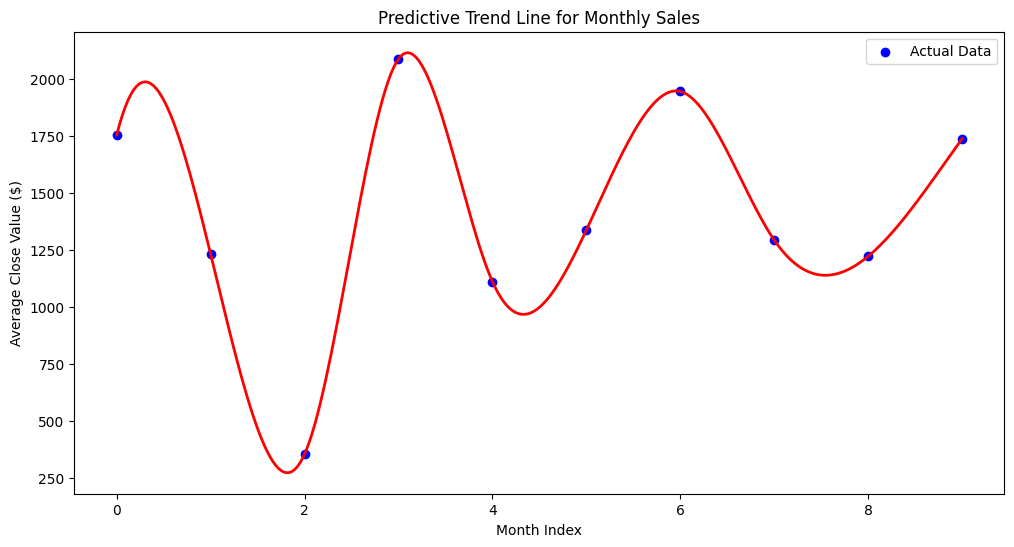

In [26]:

# 1. Correlation Matrix Heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(df[["close_value", "sales_cycle_days"]].corr(), annot=True, cmap="coolwarm", linewidths=0.5)
plt.title("Correlation Matrix")
plt.show()

# 2. Sales Funnel Analysis (Deal Stage Distribution)
plt.figure(figsize=(8, 6))
deal_stage_counts = df["deal_stage"].value_counts()
sns.barplot(x=deal_stage_counts.index, y=deal_stage_counts.values, palette="coolwarm")
plt.xlabel("Deal Stage")
plt.ylabel("Number of Deals")
plt.title("Sales Funnel Analysis")
plt.show()

# 3. Heatmap of Sales Performance (Month vs Product)
sales_heatmap_data = df.pivot_table(index="product", columns="close_month", values="close_value", aggfunc="sum")
plt.figure(figsize=(14, 6))
sns.heatmap(sales_heatmap_data, cmap="viridis", linewidths=0.5, linecolor="gray")
plt.xlabel("Month")
plt.ylabel("Product")
plt.title("Sales Heatmap (Month vs Product Revenue)")
plt.xticks(rotation=45)
plt.show()

# 4. 3D Plot of Sales Agent vs Close Value vs Sales Cycle
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(111, projection="3d")

# Taking top 10 sales agents data
top_agents = df.groupby("sales_agent")[["close_value", "sales_cycle_days"]].sum().sort_values(by="close_value", ascending=False).head(10)
x = np.arange(len(top_agents))
y = top_agents["close_value"].values
z = top_agents["sales_cycle_days"].values

ax.scatter(x, y, z, c=z, cmap="coolwarm", s=100)
ax.set_xlabel("Sales Agent Index")
ax.set_ylabel("Total Close Value ($)")
ax.set_zlabel("Avg Sales Cycle (Days)")
ax.set_title("3D Plot: Sales Agent vs Close Value vs Sales Cycle")

plt.show()

# 5. Predictive Trend Line for Monthly Sales
from scipy.interpolate import make_interp_spline

months = np.array(range(len(monthly_avg_revenue)))
values = np.array(monthly_avg_revenue.values)
spline = make_interp_spline(months, values, k=3)
smooth_x = np.linspace(months.min(), months.max(), 300)
smooth_y = spline(smooth_x)

plt.figure(figsize=(12, 6))
plt.plot(smooth_x, smooth_y, color="red", linewidth=2)
plt.scatter(months, values, color="blue", label="Actual Data")
plt.xlabel("Month Index")
plt.ylabel("Average Close Value ($)")
plt.title("Predictive Trend Line for Monthly Sales")
plt.legend()
plt.show()
